<a href="https://colab.research.google.com/github/Asvikap/Decision_tree/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import Image, display,SVG

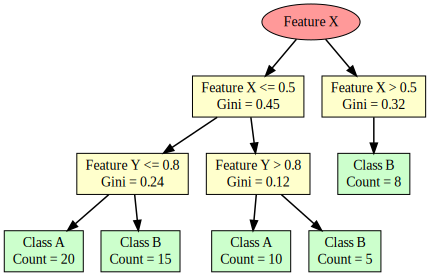

In [2]:
# Load the SVG file and display it
svg_file = '/content/decision-trees.svg'
display(SVG(filename=svg_file))

In [3]:
!pip install pydotplus --quiet

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pydotplus

In [6]:
train_data = pd.read_csv('/content/train.csv')

In [7]:
train_data

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4


In [8]:
X = train_data.drop(['AdoptionSpeed', 'PetID','RescuerID','Description'], axis=1)
y = train_data['AdoptionSpeed']

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Convert categorical columns to one-hot encoding
categorical_columns = ['Type', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
                       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health']

# Print the available column names in X_train
print("Available columns in X_train:", X_train.columns)

Available columns in X_train: Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt',
       'PhotoAmt'],
      dtype='object')


In [11]:
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_columns)

In [12]:
# Factorize the 'Name' column
X_train_encoded['Name'] = pd.factorize(X_train_encoded['Name'])[0]
X_val_encoded['Name'] = pd.factorize(X_val_encoded['Name'])[0]

In [13]:
numerical_columns = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']
scaler = MinMaxScaler()
X_train_encoded[numerical_columns] = scaler.fit_transform(X_train_encoded[numerical_columns])
X_val_encoded[numerical_columns] = scaler.transform(X_val_encoded[numerical_columns])

In [14]:
X_train_encoded

,Name,Age,Breed1,Breed2,Quantity,Fee,State,VideoAmt,PhotoAmt,Type_1,...,Vaccinated_3,Dewormed_1,Dewormed_2,Dewormed_3,Sterilized_1,Sterilized_2,Sterilized_3,Health_1,Health_2,Health_3
6786,0,0.003922,307,0,0.315789,0.0,41326,0.000,0.166667,1,...,0,0,1,0,0,1,0,1,0,0
9837,1,0.007843,307,307,0.000000,0.0,41326,0.000,0.100000,1,...,0,1,0,0,0,1,0,1,0,0
7688,2,0.003922,266,266,0.105263,0.0,41326,0.000,0.066667,0,...,0,0,1,0,0,0,1,1,0,0
6556,3,0.007843,103,307,0.000000,0.0,41326,0.000,0.033333,1,...,0,0,1,0,0,1,0,1,0,0
11322,4,0.007843,307,0,0.105263,0.0,41330,0.125,0.100000,1,...,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,234,0.188235,189,307,0.000000,0.0,41401,0.000,0.133333,1,...,0,1,0,0,1,0,0,1,0,0
13418,7457,0.011765,307,0,0.000000,0.0,41401,0.000,0.100000,1,...,0,1,0,0,0,1,0,1,0,0
5390,7458,0.047059,266,0,0.000000,0.0,41326,0.000,0.033333,0,...,0,1,0,0,1,0,0,1,0,0
860,7459,0.019608,266,0,0.052632,0.0,41401,0.000,0.066667,0,...,0,0,1,0,0,1,0,1,0,0


In [15]:
# Define the decision tree classifier
decision_tree = DecisionTreeClassifier(criterion='gini')

In [16]:
# Define hyperparameters for tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(decision_tree, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [17]:
# Get the best model and its accuracy
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

In [18]:
# Evaluate the best model on the validation set
validation_accuracy = best_model.score(X_val_encoded, y_val)

In [19]:
# Print the results
print("Best Model:", best_model)
print("Best Accuracy (on training set):", best_accuracy)
print("Validation Accuracy:", validation_accuracy)

Best Model: DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)
Best Accuracy (on training set): 0.3693509701880927
Validation Accuracy: 0.3804601533844615


In [20]:
# Export the decision tree as dot file
dot_data = export_graphviz(best_model, out_file=None, filled=True, rounded=True,
                           feature_names=X_train_encoded.columns, class_names=['0', '1', '2', '3', '4'])

# Convert dot data to graph
graph = pydotplus.graph_from_dot_data(dot_data)

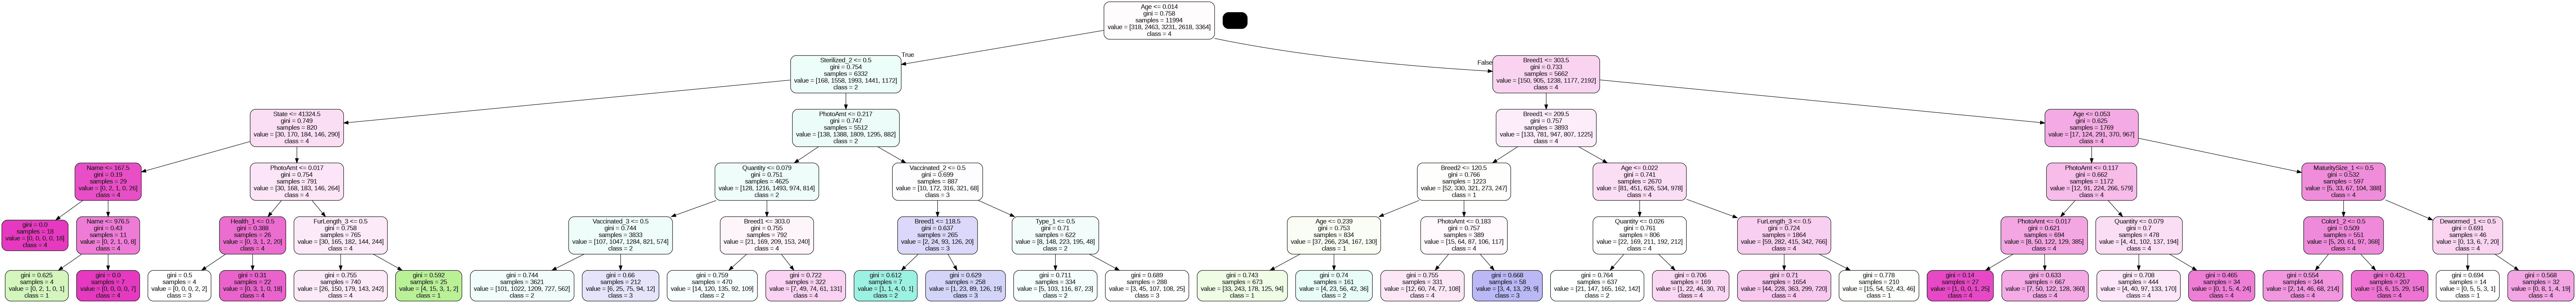

In [21]:
# Display the decision tree graph in the notebook
display(Image(graph.create_png()))